In [1]:
data <- read.csv("new_chr17_static_classified.csv")
head(data,10)
# tail(data,10)
# head(read.csv("new_chr19_static_classified.csv"))

X,binID,start,cata,aRead,bRead,aNorm,bNorm
110123,chr17_3002800,3002700,3,26,55,50.000000,45.081967
49672,chr17_3002800,3002700,2,22,61,42.307692,50.000000
1,chr17_3002800,3002700,1,4,6,7.692308,4.918033
110124,chr17_3005300,3005200,3,76,106,56.716418,50.000000
49673,chr17_3005300,3005200,2,47,100,35.074627,47.169811
2,chr17_3005300,3005200,1,11,6,8.208955,2.830189
110125,chr17_3011100,3011000,3,204,292,67.326733,67.749420
49674,chr17_3011100,3011000,2,82,117,27.062706,27.146172
3,chr17_3011100,3011000,1,17,22,5.610561,5.104408
110126,chr17_3015900,3015800,3,211,333,75.627240,72.234273


In [2]:
high_sub <- data[data$cata == 3, c("binID", "start", "aRead")]
names(high_sub) <- c("binID", "start", "high")
# head(high_sub)
medium_sub <- data[data$cata == 2, c("binID", "start", "aRead")]
names(medium_sub) <- c("binID", "start", "medium")
# head(medium_sub)
low_sub <- data[data$cata == 1, c("binID", "start", "aRead")]
names(low_sub) <- c("binID", "start", "low")
# head(low_sub)

# merge
clusterdf <- merge(high_sub, medium_sub, all = TRUE)
clusterdf <- merge(clusterdf, low_sub, all = TRUE)
clusterdf <- clusterdf[order(as.numeric(clusterdf$start)),]
clusterdf[is.na(clusterdf)] <- 0
head(clusterdf,10)

,binID,start,high,medium,low
14860,chr17_3002800,3002700,26,22,4
14879,chr17_3005300,3005200,76,47,11
14920,chr17_3011100,3011000,204,82,17
14963,chr17_3015900,3015800,211,56,12
15001,chr17_3019000,3018900,263,48,20
15053,chr17_3022800,3022700,220,34,6
15056,chr17_3023200,3023100,10,2,0
15071,chr17_3024600,3024500,0,74,31
15103,chr17_3027600,3027500,90,47,8
15111,chr17_3028200,3028100,63,41,12


In [3]:
paste("Total number of Bins:", nrow(clusterdf))

[1] "Total number of Bins: 65007"

In [4]:
# write.csv(clusterdf, "A_clusterdf_count.csv")

In [5]:
dist_tolerance <- 100
# meth_tolerance <- 40 
# cor_2_cutoff <- 0.9
alpha <- 0.05

In [6]:
pre.row <- clusterdf[1,]

dist.fun <- function(row) {
    dist <- as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"]))
    pre.row <<- row
    return(c(row["binID"], row["start"], row["high"], row["medium"], row["low"], dist = dist)) 
}

dist.result <- t(apply(clusterdf, 1, dist.fun))
dist.result <- as.data.frame(dist.result)
head(dist.result, 30)

,binID,start,high,medium,low,dist
14860,chr17_3002800,3002700,26,22,4,0
14879,chr17_3005300,3005200,76,47,11,2500
14920,chr17_3011100,3011000,204,82,17,5800
14963,chr17_3015900,3015800,211,56,12,4800
15001,chr17_3019000,3018900,263,48,20,3100
15053,chr17_3022800,3022700,220,34,6,3800
15056,chr17_3023200,3023100,10,2,0,400
15071,chr17_3024600,3024500,0,74,31,1400
15103,chr17_3027600,3027500,90,47,8,3000
15111,chr17_3028200,3028100,63,41,12,600


In [7]:
dist.result <- dist.result[as.numeric(as.character(dist.result$dist)) <= dist_tolerance, ]
head(dist.result)

dist.result <- dist.result[-1,]
head(dist.result)
nrow(dist.result)

,binID,start,high,medium,low,dist
14860,chr17_3002800,3002700,26,22,4,0
15233,chr17_3044500,3044400,36,4,0,100
15235,chr17_3044600,3044500,63,4,0,100
15237,chr17_3044700,3044600,83,37,0,100
15239,chr17_3044800,3044700,102,0,0,100
15344,chr17_3056900,3056800,71,28,8,100


,binID,start,high,medium,low,dist
15233,chr17_3044500,3044400,36,4,0,100
15235,chr17_3044600,3044500,63,4,0,100
15237,chr17_3044700,3044600,83,37,0,100
15239,chr17_3044800,3044700,102,0,0,100
15344,chr17_3056900,3056800,71,28,8,100
15345,chr17_3057000,3056900,22,9,0,100


[1] 9762

In [8]:
start.pos <- dist.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]  3044300  3044400  3044500  3044600  3044700  3056700  3056800  3056900
    [9]  3057000  3080900  3081000  3106000  3106100  3130200  3130300  3151800
   [17]  3151900  3157500  3157600  3157700  3157800  3157900  3166300  3166400
   [25]  3192100  3192200  3222100  3222200  3227600  3227700  3230700  3230800
   [33]  3234600  3234700  3236400  3236500  3250800  3250900  3256200  3256300
   [41]  3262700  3262800  3270400  3270500  3273600  3273700  3274700  3274800
   [49]  3278100  3278200  3281700  3281800  3299900  3300000  3336600  3336700
   [57]  3337000  3337100  3338800  3338900  3350100  3350200  3350300  3352700
   [65]  3352800  3352900  3353000  3353100  3397400  3397500  3398900  3399000
   [73]  3418300  3418400  3418800  3418900  3436600  3436700  3437300  3437400
   [81]  3447300  3447400  3454900  3455000  3455100  3464900  3465000  3465100
   [89]  3488500  3488600  3496800  3496900  3514600  3514700  3515900  3516000
   [97]  3557100  3557200  3571100  3571200  3612500  3612600  3659400  3659500
  [105]  3669600  3669700  3669800  3679600  3679700  3685500  3685600  3685800
  [113]  3685900  3696100  3696200  3697600  3697700  3756500  3756600  3805100
  [121]  3805200  3828800  3828900  3885000  3885100  3887700  3887800  3934500
  [129]  3934600  4011500  4011600  4011900  4012000  4018100  4018200  4019400
  [137]  4019500  4029400  4029500  4036400  4036500  4069300  4069400  4129600
  [145]  4129700  4131300  4131400  4176400  4176500  4180100  4180200  4223700
  [153]  4223800  4242600  4242700  4296800  4296900  4300200  4300300  4401400
  [161]  4401500  4403400  4403500  4442700  4442800  4498400  4498500  4537600
  [169]  4537700  4538200  4538300  4544000  4544100  4550600  4550700  4550800
  [177]  4553400  4553500  4565900  4566000  4573800  4573900  4603300  4603400
  [185]  4603500  4612200  4612300  4648200  4648300  4648500  4648600  4648700
  [193]  4651400  4651500  4665600  4665700  4727300  4727400  4778000  4778100
  [201]  4786000  4786100  4786200  4787900  4788000  4792200  4792300  4828700
  [209]  4828800  4837400  4837500  4857700  4857800  4872100  4872200  4881000
  [217]  4881100  4894000  4894100  4904500  4904600  4908400  4908500  4909000
  [225]  4909100  4909200  4920000  4920100  4922400  4922500  4922600  4933500
  [233]  4933600  4937100  4937200  4956900  4957000  4957100  4960700  4960800
  [241]  4960900  4973800  4973900  4993500  4993600  4993700  4993800  5000900
  [249]  5001000  5005900  5006000  5008100  5008200  5008300  5017300  5017400
  [257]  5037200  5037300  5051900  5052000  5052700  5052800  5062900  5063000
  [265]  5066500  5066600  5068000  5068100  5081700  5081800  5081900  5082400
  [273]  5082500  5087400  5087500  5087600  5090500  5090600  5091800  5091900
  [281]  5092000  5094600  5094700  5110900  5111000  5111100  5111800  5111900
  [289]  5116000  5116100  5133000  5133100  5135400  5135500  5137400  5137500
  [297]  5141200  5141300  5145500  5145600  5151800  5151900  5163200  5163300
  [305]  5163400  5165100  5165200  5165300  5170300  5170400  5170500  5175800
  [313]  5175900  5180700  5180800  5184800  5184900  5215500  5215600  5221500
  [321]  5221600  5226800  5226900  5229800  5229900  5230100  5230200  5233000
  [329]  5233100  5236400  5236500  5237100  5237200  5239900  5240000  5241100
  [337]  5241200  5241300  5241400  5241500  5241600  5247700  5247800  5250300
  [345]  5250400  5250600  5250700  5271600  5271700  5271800  5279300  5279400
  [353]  5283100  5283200  5284600  5284700  5286100  5286200  5286300  5294000
  [361]  5294100  5296700  5296800  5305900  5306000  5308100  5308200  5314300
  [369]  5314400  5314500  5314600  5322100  5322200  5324200  5324300  5344800
  [377]  5344900  5351900  5352000  5353200  5353300  5353600  5353700  5359900
  [385]  5360000  5368000  5368100  5383900  5384000  5392500  5392600  5399800
  [393]  5399900  5404600  5404700  5404900  5405000  5406500  5406600  5406800
  [4

In [9]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
dist.result <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
15232,chr17_3044400,3044300,21,3,0
15233,chr17_3044500,3044400,36,4,0
15235,chr17_3044600,3044500,63,4,0
15237,chr17_3044700,3044600,83,37,0
15239,chr17_3044800,3044700,102,0,0
15343,chr17_3056800,3056700,93,43,5
15344,chr17_3056900,3056800,71,28,8
15345,chr17_3057000,3056900,22,9,0
15346,chr17_3057100,3057000,62,29,13
15581,chr17_3081000,3080900,129,26,0


In [10]:
pre.row <- dist.result[1,]

test.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = "0"))
    } else {
        test.matrix <- cbind(c(as.numeric(as.character(pre.row["high"])),
                               as.numeric(as.character(pre.row["medium"])),
                               as.numeric(as.character(pre.row["low"]))),
                             c(as.numeric(as.character(row["high"])), 
                               as.numeric(as.character(row["medium"])),
                               as.numeric(as.character(row["low"]))))
        test.matrix <- test.matrix[rowSums(test.matrix) > 0, ]
        value <- suppressWarnings(chisq.test(test.matrix)$p.value)
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = as.character(value)))
    }
}

test.result <- apply(dist.result[-1,], MARGIN = 1, FUN = test.fun)
test.result <- t(test.result)
test.result <- as.data.frame(test.result)
head(test.result)

,binID,start,p.value
15233,chr17_3044500,3044400,1
15235,chr17_3044600,3044500,0.698790880992712
15237,chr17_3044700,3044600,0.000172604232996841
15239,chr17_3044800,3044700,2.48249469341349e-09
15343,chr17_3056800,3056700,0
15344,chr17_3056900,3056800,0.334128477625105


In [11]:
good.result <- test.result[as.numeric(as.character(test.result$p.value)) > alpha,]
head(good.result)

,binID,start,p.value
15233,chr17_3044500,3044400,1
15235,chr17_3044600,3044500,0.698790880992712
15344,chr17_3056900,3056800,0.334128477625105
15345,chr17_3057000,3056900,0.291245456292042
15346,chr17_3057100,3057000,0.111871272561439
16381,chr17_3157800,3157700,0.594782953182526


In [12]:
start.pos <- good.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]  3044300  3044400  3044500  3056700  3056800  3056900  3057000  3157600
   [9]  3157700  3192100  3192200  3227600  3227700  3234600  3234700  3250800
  [17]  3250900  3262700  3262800  3299900  3300000  3336600  3336700  3398900
  [25]  3399000  3418300  3418400  3455000  3455100  3465000  3465100  3612500
  [33]  3612600  3659400  3659500  3685500  3685600  3697600  3697700  3756500
  [41]  3756600  3805100  3805200  3828800  3828900  3887700  3887800  4011500
  [49]  4011600  4019400  4019500  4029400  4029500  4131300  4131400  4223700
  [57]  4223800  4242600  4242700  4401400  4401500  4403400  4403500  4442700
  [65]  4442800  4550700  4550800  4603400  4603500  4648600  4648700  4651400
  [73]  4651500  4665600  4665700  4727300  4727400  4786000  4786100  4792200
  [81]  4792300  4828700  4828800  4837400  4837500  4857700  4857800  4881000
  [89]  4881100  4894000  4894100  4904500  4904600  4909000  4909100  4920000
  [97]  4920100  4922400  4922500  4922600  4933500  4933600  4973800  4973900
 [105]  5005900  5006000  5008100  5008200  5051900  5052000  5062900  5063000
 [113]  5066500  5066600  5068000  5068100  5087400  5087500  5090500  5090600
 [121]  5091900  5092000  5094600  5094700  5111000  5111100  5111800  5111900
 [129]  5135400  5135500  5137400  5137500  5141200  5141300  5184800  5184900
 [137]  5226800  5226900  5236400  5236500  5241100  5241200  5241400  5241500
 [145]  5250300  5250400  5271700  5271800  5279300  5279400  5283100  5283200
 [153]  5314500  5314600  5322100  5322200  5351900  5352000  5353600  5353700
 [161]  5368000  5368100  5392500  5392600  5399800  5399900  5404600  5404700
 [169]  5404900  5405000  5418000  5418100  5430900  5431000  5431600  5431700
 [177]  5431800  5437700  5437800  5455900  5456000  5473000  5473100  5495100
 [185]  5495200  5539600  5539700  5541600  5541700  5583900  5584000  5602400
 [193]  5602500  5611900  5612000  5613800  5613900  5614000  5621900  5622000
 [201]  5641800  5641900  5655500  5655600  5655700  5659500  5659600  5693300
 [209]  5693400  5707600  5707700  5768200  5768300  5772200  5772300  5777700
 [217]  5777800  5819800  5819900  5865900  5866000  5879400  5879500  5879700
 [225]  5879800  5882900  5883000  5883100  5883200  5883300  5883400  5904600
 [233]  5904700  5941900  5942000  6001200  6001300  6036400  6036500  6046800
 [241]  6046900  6047000  6052000  6052100  6059100  6059200  6072000  6072100
 [249]  6088300  6088400  6131900  6132000  6139900  6140000  6152500  6152600
 [257]  6154500  6154600  6161600  6161700  6185600  6185700  6219400  6219500
 [265]  6230200  6230300  6232400  6232500  6232600  6265400  6265500  6273700
 [273]  6273800  6274900  6275000  6275100  6276400  6276500  6281600  6281700
 [281]  6282900  6283000  6283100  6283200  6283300  6284000  6284100  6286300
 [289]  6286400  6292900  6293000  6297400  6297500  6299600  6299700  6303600
 [297]  6303700  6305600  6305700  6308300  6308400  6329700  6329800  6339300
 [305]  6339400  6339600  6339700  6340600  6340700  6341100  6341200  6349900
 [313]  6350000  6351200  6351300  6351400  6363300  6363400  6371500  6371600
 [321]  6397300  6397400  6399800  6399900  6400400  6400500  6402200  6402300
 [329]  6405900  6406000  6433000  6433100  6434900  6435000  6436500  6436600
 [337]  6441400  6441500  6441800  6441900  6445500  6445600  6445700  6448200
 [345]  6448300  6449100  6449200  6449300  6451300  6451400  6451500  6451600
 [353]  6455100  6455200  6456100  6456200  6459300  6459400  6463400  6463500
 [361]  6466900  6467000  6471600  6471700  6478800  6478900  6482400  6482500
 [369]  6493700  6493800  6501900  6502000  6519800  6519900  6521300  6521400
 [377]  6521900  6522000  6534000  6534100  6565100  6565200  6571300  6571400
 [385]  6578600  6578700  6582500  6582600  6582700  6586100  6586200  6595400
 [393]  6595500  6598300  6598400  6598500  6601400  6601500  6601800  6601900
 [401]  6604600  6604700  6608400  6608500  6613300  

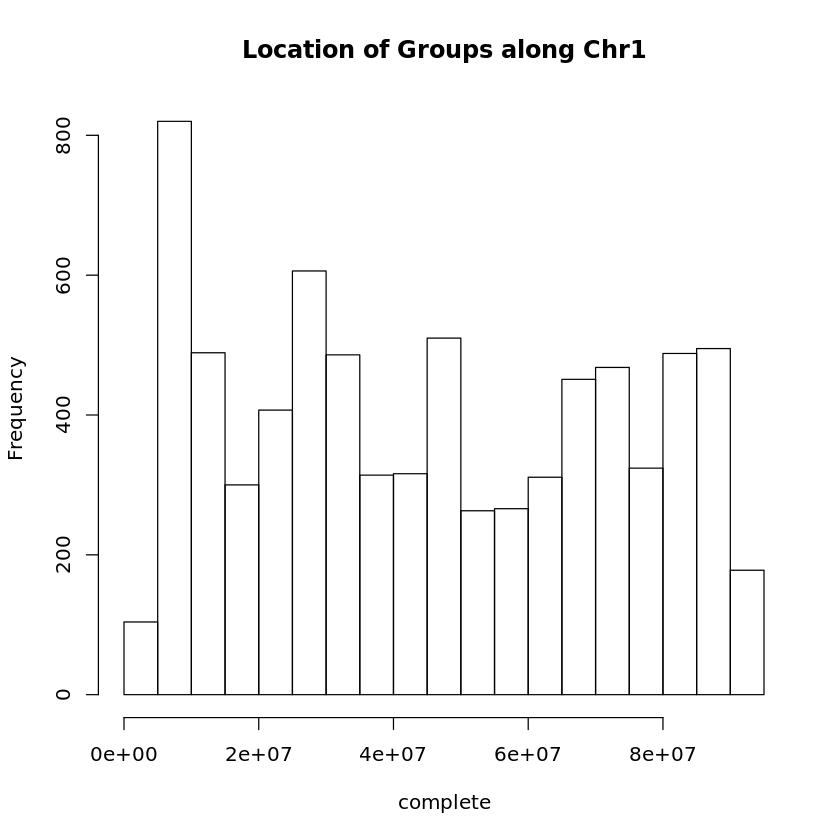

In [13]:
hist(complete, main = "Location of Groups along Chr1")

In [14]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
grouping <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
15232,chr17_3044400,3044300,21,3,0
15233,chr17_3044500,3044400,36,4,0
15235,chr17_3044600,3044500,63,4,0
15343,chr17_3056800,3056700,93,43,5
15344,chr17_3056900,3056800,71,28,8
15345,chr17_3057000,3056900,22,9,0
15346,chr17_3057100,3057000,62,29,13
16380,chr17_3157700,3157600,103,0,2
16381,chr17_3157800,3157700,81,0,0
16775,chr17_3192200,3192100,204,21,0


In [15]:
paste("Total number of bins grouped:", nrow(grouping))

[1] "Total number of bins grouped: 7596"

In [16]:
library(ggplot2)

In [17]:
pre.row <- grouping[1,]

part <- data.frame()
part <- rbind(part, pre.row)

counter = 1
sep.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        part <<- rbind(part, data.frame(binID = c(paste("gap", counter)), 
                                        start = c(0), high = c(100), medium = c(100), low = c(100)))
        counter <<- counter + 1
    }
    part <<- rbind(part, row)
    pre.row <<- row
}

invisible(apply(grouping[-1,], 1, sep.fun))

In [18]:
part[20:60,]

,binID,start,high,medium,low
20,chr17_3234800,3234700,102,21,4
110,gap 6,0,100,100,100
22,chr17_3250900,3250800,81,17,0
23,chr17_3251000,3250900,99,32,5
112,gap 7,0,100,100,100
25,chr17_3262800,3262700,226,42,5
26,chr17_3262900,3262800,173,36,11
113,gap 8,0,100,100,100
28,chr17_3300000,3299900,176,39,2
29,chr17_3300100,3300000,46,7,1


In [19]:
head(part)
tail(part)

,binID,start,high,medium,low
15232,chr17_3044400,3044300,21,3,0
2,chr17_3044500,3044400,36,4,0
3,chr17_3044600,3044500,63,4,0
1,gap 1,0,100,100,100
5,chr17_3056800,3056700,93,43,5
6,chr17_3056900,3056800,71,28,8


,binID,start,high,medium,low
14127,gap 3546,0,100,100,100
111391,chr17_94774500,94774400,75,22,7
111401,chr17_94774600,94774500,134,34,4
14128,gap 3547,0,100,100,100
111421,chr17_94865100,94865000,0,0,73
111431,chr17_94865200,94865100,0,0,78


In [20]:
write.csv(part, "chr17_A_group.csv")

[1] "Total Number of groups: 3548"

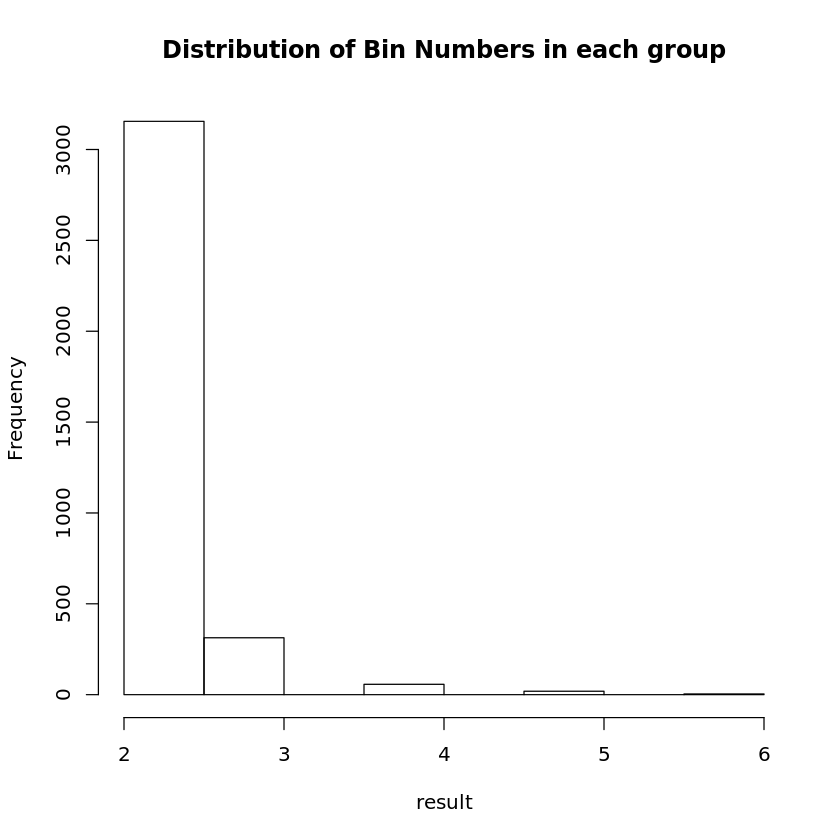

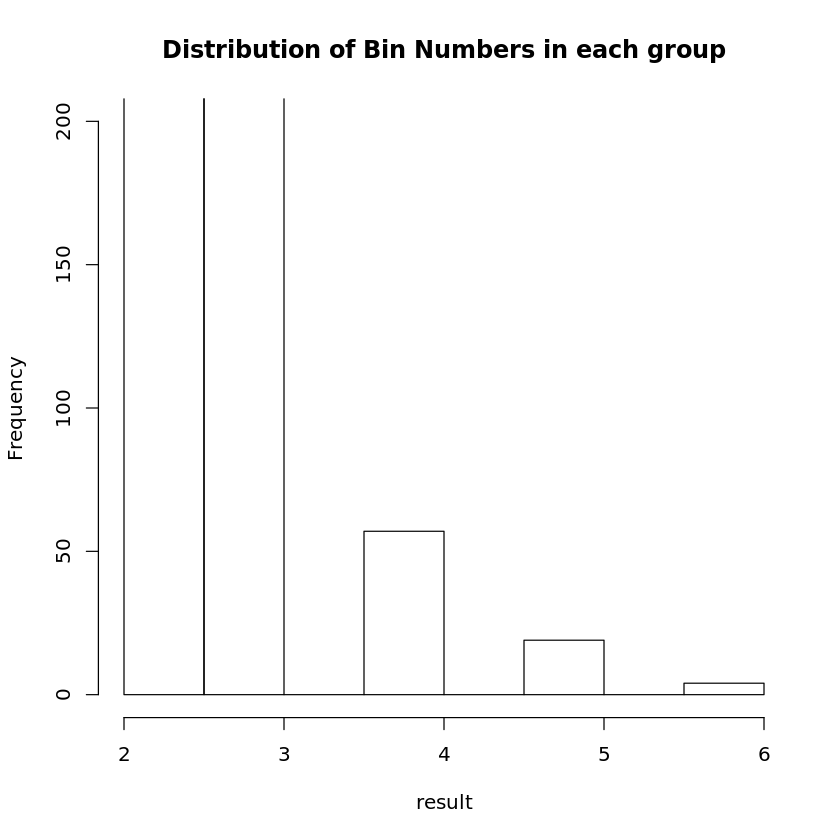

In [21]:
count = 0
result = c()
for (row in 1:nrow(part)) {
    if (substr(as.character(part[row, "binID"]), 1, 3) != "gap") {
        count = count + 1
    } else {
        result = c(result, count)
        count = 0
    }
}

result = c(result, count)

paste("Total Number of groups:", length(result))
hist(result, main = "Distribution of Bin Numbers in each group")
hist(result, ylim = c(0, 200), main = "Distribution of Bin Numbers in each group")

In [22]:
# plotdf <- data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,3])), cata = c(3))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,4])), cata = c(4)))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,5])), cata = c(5)))


# plotdf

In [23]:
# for (i in 2:nrow(part)){
#     if (substr(as.character(part[i,1]),1,3) == "gap"){
#         plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(100), cata = c(1)))
#     } else {
#         for (j in 3:5){
#             plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(as.numeric(as.character(part[i,j]))), cata = c(j)))
#         }
#     }
    
# }

# head(plotdf, 10)

In [24]:
# plotdf$cata <- factor(plotdf$cata, levels = c(3,4,5,1), labels = c("high", "medium", "low", "gap"))

# head(plotdf,100)

In [25]:
# plotdf$bin_ID <- factor(plotdf$bin_ID, levels = unique(plotdf$bin_ID))

In [26]:
# plotdf$per <- as.numeric(as.character(plotdf$per))

In [27]:
# names(plotdf) <- c("bin_ID", "count", "cata")

In [28]:
# ggplot(data = plotdf, aes(x = bin_ID, y = count, fill = factor(cata))) + coord_flip() + 
#   geom_bar(stat = "identity", width = 2) + ylim(0, 300) + scale_fill_brewer(palette="Spectral")

In [29]:
# zoomindf <- head(plotdf, 200)
# ggplot(data = zoomindf, aes(x = bin_ID, y = count, fill = factor(cata))) + 
#   geom_bar(stat = "identity") + ylim(0, 500) + scale_fill_brewer(palette="Spectral")